In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
sample_base = '../io/sample/'
img_base_list = glob.glob(sample_base + '*/')
img_base_list.sort()

In [5]:
from astropy.visualization import make_lupton_rgb

../io/sample/nircam1/
../io/sample/nircam2/


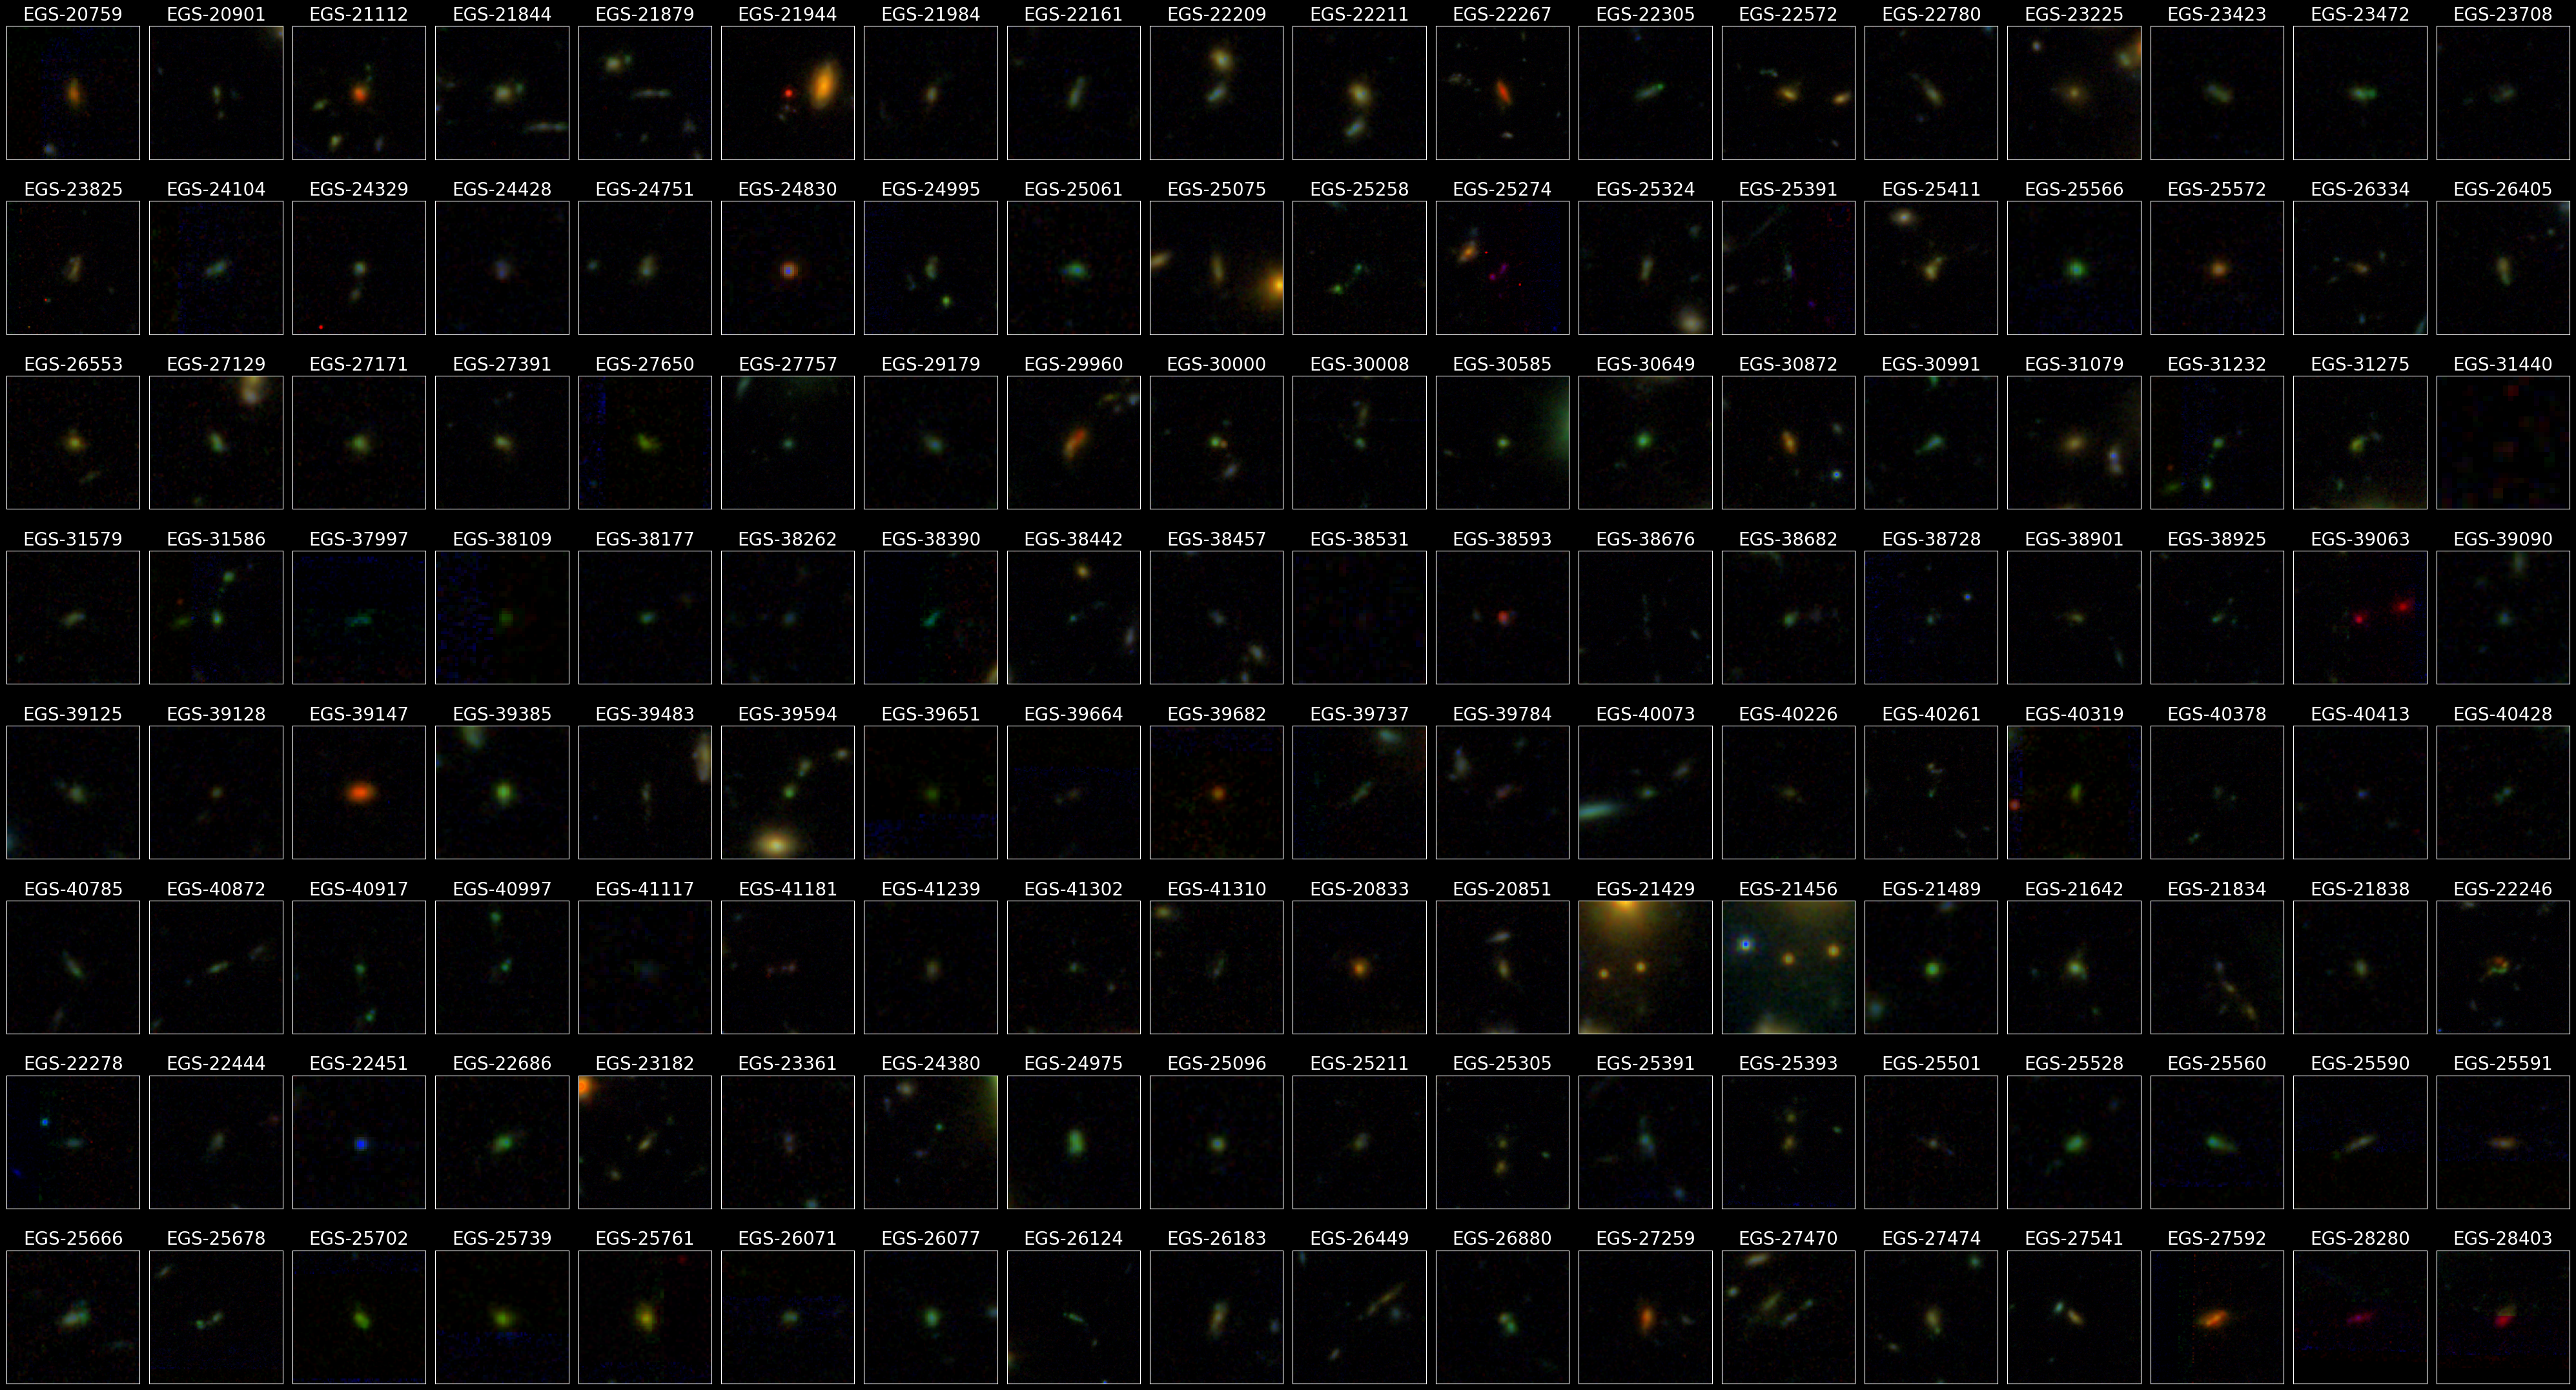

ValueError: Too many images

In [24]:
xaxis = 18
yaxis = 8
fig, ax = plt.subplots(yaxis, xaxis, figsize=(40, 22))
fig.patch.set_color('black')
i = 0
j = 0
for img_base_dir in img_base_list:
    print(img_base_dir)
    img_dir_list = glob.glob(img_base_dir + '*/')
    img_dir_list.sort()
    for img_dir in img_dir_list:
        img_b = fits.getdata(img_dir + 'sci_F115W.fits')
        img_g = fits.getdata(img_dir + 'sci_F277W.fits')
        img_r = fits.getdata(img_dir + 'sci_F444W.fits')
        img = make_lupton_rgb(img_r, img_g, img_b, stretch=0.2, Q=10)
        ax[i,j].imshow(img, cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title('EGS-'+img_dir.split('/')[-2], fontsize=20, color='white')
        for spine in ax[i,j].spines.values():
            spine.set_edgecolor('white')
        j += 1
        if j == xaxis:
            j = 0
            i += 1
            if i == yaxis:
                plt.tight_layout()
                plt.savefig('egs_sample2.png', dpi=300, bbox_inches='tight')
                plt.show()
                raise ValueError('Too many images')
